In [1]:
import time

import cv2
import gluoncv as gcv
import matplotlib.pyplot as plt
import mxnet as mx

In [2]:
# Load the model
net = gcv.model_zoo.get_model('ssd_512_mobilenet1.0_voc', pretrained=True)

/root/.local/lib/python3.5/site-packages/mxnet/gluon/block.py:421: UserWarning: load_params is deprecated. Please use load_parameters.
  warnings.warn("load_params is deprecated. Please use load_parameters.")


In [3]:
# Load the webcam handler
cap = cv2.VideoCapture(0)
time.sleep(1) ### letting the camera autofocus

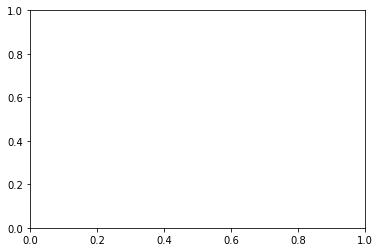

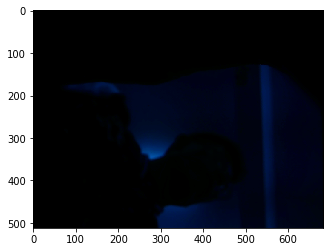

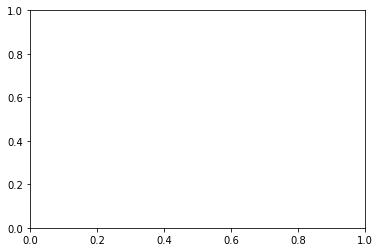

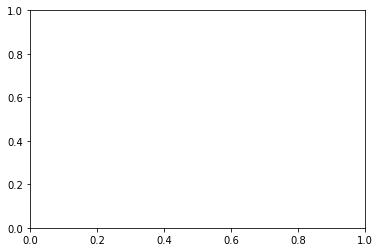

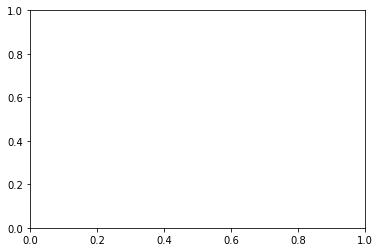

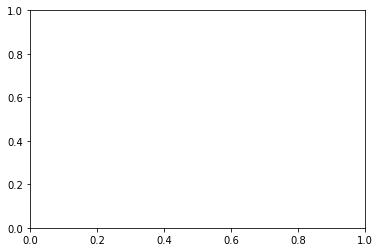

In [4]:
axes = None
NUM_FRAMES = 5 # you can change this  200
for i in range(NUM_FRAMES):
    # Load frame from the camera
    ret, frame = cap.read()

    # Image pre-processing
    frame = mx.nd.array(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)).astype('uint8')
    rgb_nd, frame = gcv.data.transforms.presets.ssd.transform_test(frame, short=512, max_size=700)

    # Run frame through network
    class_IDs, scores, bounding_boxes = net(rgb_nd)

    # Display the result
    plt.cla()
    axes = gcv.utils.viz.plot_bbox(frame, bounding_boxes[0], scores[0], class_IDs[0], class_names=net.classes, ax=axes)
    plt.draw()
    plt.pause(0.001)